<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Data_description_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [158]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [159]:
import pandas as pd

url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/data_2020.xlsx?raw=true'
df_2020 = pd.read_excel(url)



##Data Description 2020

In [160]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2145 non-null   int64  
 1   p_infrastructure       2145 non-null   float64
 2   p_forested             2145 non-null   float64
 3   p_agriculture          2145 non-null   float64
 4   p_improductible        2145 non-null   float64
 5   surface_polygone       2145 non-null   float64
 6   natural_growth_1000    2145 non-null   float64
 7   density                2145 non-null   float64
 8   dependency_ratio       2145 non-null   float64
 9   migration_intern       2145 non-null   float64
 10  migration              2145 non-null   float64
 11  p_employment           2145 non-null   float64
 12  primary_sector         2145 non-null   float64
 13  secondary_sector       2145 non-null   float64
 14  tertiary_sector        2145 non-null   float64
 15  p_so

Rename some spelling errors columns

In [161]:
df_2020 = df_2020.rename(columns={'p_improductible': 'p_unproductive'})
df_2020 = df_2020.rename(columns={'p_new_entreprise': 'p_new_enterprise'})

In [162]:
df_2020.describe()

,ID,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,...,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,3289.818182,0.158968,0.326205,0.449217,0.065521,1856.974168,0.654317,444.820686,67.176986,4.048122,...,17.147792,59.415219,3987.226527,20.376726,19.610593,0.429263,0.579187,109.141118,37811.926677,4.364536
std,2133.934762,0.153436,0.160898,0.191230,0.139096,3378.290930,6.082067,801.936889,9.242258,20.765305,...,9.707020,13.593901,12948.907725,3.328135,4.377195,0.208710,0.230824,182.736145,15409.772494,3.856459
min,1.000000,0.001505,0.000000,0.000000,0.000000,31.000000,-43.243243,0.825294,31.481481,-125.786164,...,0.000000,0.000000,32.000000,2.040816,5.808477,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1067.000000,0.062319,0.207513,0.319037,0.003188,442.000000,-2.171995,82.336957,61.338532,-7.159214,...,9.735531,51.461988,740.000000,18.614389,16.595451,0.266845,0.408319,28.730000,30788.931771,1.981132
50%,3296.000000,0.108153,0.312115,0.469442,0.010854,832.000000,0.886525,189.460784,66.348449,2.574949,...,15.432099,61.538462,1600.000000,20.527091,19.163410,0.417888,0.617521,60.990000,34960.337178,3.245943
75%,5411.000000,0.204301,0.426199,0.597001,0.047372,1681.000000,3.957457,480.884676,72.040816,13.533671,...,23.486842,68.929198,3913.000000,22.377622,21.951220,0.591635,0.781933,131.380000,40433.462867,5.447471
max,6810.000000,0.983051,0.893204,0.916667,0.949424,43861.000000,38.834951,12796.986817,168.750000,154.838710,...,58.810409,96.153846,421878.000000,37.209302,40.666667,1.000000,1.000000,4829.330000,452632.653061,46.100917


In [163]:
w_pop = df_2020.iloc[:, 22].tolist()  # the column of the population

w_surf = df_2020.iloc[:, 27].tolist() # the column of the surface

In [164]:
print(df_2020.columns)

Index(['ID', 'p_infrastructure', 'p_forested', 'p_agriculture',
       'p_unproductive', 'surface_polygone', 'natural_growth_1000', 'density',
       'dependency_ratio', 'migration_intern', 'migration', 'p_employment',
       'primary_sector', 'secondary_sector', 'tertiary_sector',
       'p_social_assistance', 'p_new_buildings', 'p_new_housings', 'p_cinema',
       'p_museum', 'p_culture_institution', 'size_households',
       'p_new_enterprise', 'p_weddings', 'p_foreigners', 'p_individual_houses',
       'Population', 'p_pop_19', 'p_pop_65', 'lat', 'long', 'zab_2022',
       'net_income_h', 'p_transport'],
      dtype='object')


In [165]:
df_2020.head()

,ID,p_infrastructure,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,...,p_foreigners,p_individual_houses,Population,p_pop_19,p_pop_65,lat,long,zab_2022,net_income_h,p_transport
0,3,0.177658,0.286676,0.526245,0.010767,743.0,4.650331,755.047106,68.620379,-0.536577,...,17.308378,71.557156,5610.0,21.922406,14.136126,0.565600,0.756055,92.40,45237.221823,5.107527
1,27,0.435484,0.447581,0.104839,0.020161,248.0,-0.547121,1490.725806,59.974037,15.592942,...,23.262104,61.704835,3697.0,26.069246,14.460285,0.605342,0.945369,113.23,39810.819037,10.800000
2,29,0.227273,0.561983,0.165289,0.037190,242.0,7.263123,641.322314,62.343096,9.904259,...,17.396907,70.833333,1552.0,25.307125,14.987715,0.602022,0.943557,46.35,51245.633040,6.666667
3,52,0.315615,0.306755,0.369878,0.006645,903.0,3.621358,1320.487265,59.989266,-2.610746,...,25.226434,58.082497,11924.0,31.192661,11.009174,0.601838,0.820014,230.67,40517.938092,8.758315
4,61,0.238289,0.334012,0.405295,0.022403,491.0,3.766478,217.311609,69.904459,10.357815,...,11.059044,77.094972,1067.0,21.890547,16.915423,0.571598,0.896693,45.26,43108.514664,5.295316


In [166]:
df_2020.drop('tertiary_sector', axis=1, inplace=True)
df_2020.drop('p_infrastructure', axis=1, inplace=True)
df_2020.drop('p_pop_65', axis=1, inplace=True)
df_2020.drop('p_cinema', axis=1, inplace=True)
df_2020.drop('p_museum', axis=1, inplace=True)
df_2020.drop('lat', axis=1, inplace=True)
df_2020.drop('long', axis=1, inplace=True)
df_2020.drop('p_weddings', axis=1, inplace=True)
df_2020.to_csv('data_unscaled_2020.csv', index = False, sep=',')

In [167]:
df_ID =  df_2020.iloc[:,0]
df_2020 =  df_2020.iloc[:,1:]
df_2020

,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,p_employment,...,p_culture_institution,size_households,p_new_enterprise,p_foreigners,p_individual_houses,Population,p_pop_19,zab_2022,net_income_h,p_transport
0,0.286676,0.526245,0.010767,743.0,4.650331,755.047106,68.620379,-0.536577,1.073153,0.109269,...,0.005882,2.368689,0.002674,17.308378,71.557156,5610.0,21.922406,92.40,45237.221823,5.107527
1,0.447581,0.104839,0.020161,248.0,-0.547121,1490.725806,59.974037,15.592942,7.933251,0.250744,...,0.001893,2.178188,0.002975,23.262104,61.704835,3697.0,26.069246,113.23,39810.819037,10.800000
2,0.561983,0.165289,0.037190,242.0,7.263123,641.322314,62.343096,9.904259,24.430505,0.239691,...,0.004510,2.302147,0.000000,17.396907,70.833333,1552.0,25.307125,46.35,51245.633040,6.666667
3,0.306755,0.369878,0.006645,903.0,3.621358,1320.487265,59.989266,-2.610746,7.074280,0.347618,...,0.003774,2.331625,0.003690,25.226434,58.082497,11924.0,31.192661,230.67,40517.938092,8.758315
4,0.334012,0.405295,0.022403,491.0,3.766478,217.311609,69.904459,10.357815,-3.766478,0.205248,...,0.005623,2.440092,0.007498,11.059044,77.094972,1067.0,21.890547,45.26,43108.514664,5.295316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.452613,0.469442,0.033658,1129.0,0.000000,90.611160,62.639110,21.749876,0.988631,0.119257,...,0.000000,2.157113,0.000000,7.135875,49.185668,1023.0,20.930233,24.12,30363.800000,1.418440
2141,0.207293,0.714254,0.003978,4525.0,2.129623,155.602210,64.279048,-5.537020,2.981472,0.322113,...,0.005397,2.449434,0.001420,9.955972,37.151248,7041.0,14.666667,148.00,30680.513767,2.096667
2142,0.417952,0.485273,0.021038,713.0,-2.884615,145.021038,59.567901,-9.615385,-1.923077,0.174081,...,0.006770,2.566416,0.004836,7.930368,69.184290,1034.0,4.761905,28.49,38328.871893,1.977401
2143,0.294309,0.507317,0.026016,615.0,4.226840,465.528455,61.477721,34.166960,-7.396971,0.397485,...,0.004890,2.413969,0.002445,17.394342,76.566757,2863.0,8.791209,85.39,37962.415631,3.453947


In [168]:
df_ID 

0          3
1         27
2         29
3         52
4         61
        ... 
2140     767
2141    1098
2142    3219
2143    4072
2144    5530
Name: ID, Length: 2145, dtype: int64

Replace the outliers by the median

In [169]:
# calculate the boundaries
#lower_bound = df_2020.mean() - 3 * df_2020.std()
#upper_bound = df_2020.mean() + 3 * df_2020.std()

# replace the outliers by the median
#for column in df_2020.columns:
#    median = df_2020[column].median()
#    df_2020.loc[df_2020[column] < lower_bound[column], column] = median
#    df_2020.loc[df_2020[column] > upper_bound[column], column] = median


In [170]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020
nostdf_2020['ID'] = df_ID

scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)

df_2020 = pd.DataFrame(data=stdf_2020, columns=df_2020.columns)
df_2020['ID'] = df_ID


Change some data with a log

In [171]:
from sklearn.preprocessing import MinMaxScaler

# Créer une instance de MinMaxScaler
scaler = MinMaxScaler()
# Appliquer la mise à l'échelle min-max aux données
scaled_data_SOM = scaler.fit_transform(nostdf_2020)

scaled_data_SOM = pd.DataFrame(data=scaled_data_SOM, columns = nostdf_2020.columns)
scaled_data_SOM['ID'] = df_ID
scaled_data_SOM.to_csv('scaled_data_SOM_2020.csv', index = False, sep=',')
scaled_data_SOM

,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,p_employment,...,size_households,p_new_enterprise,p_foreigners,p_individual_houses,Population,p_pop_19,zab_2022,net_income_h,p_transport,ID
0,0.320952,0.574085,0.011341,0.016245,0.583512,0.058941,0.270557,0.446324,0.496834,0.022111,...,0.499697,0.116167,0.294308,0.744194,0.013223,0.565324,0.019133,0.099942,0.110790,3
1,0.501096,0.114370,0.021235,0.004951,0.520188,0.116433,0.207568,0.503801,0.533844,0.050739,...,0.387302,0.129270,0.395544,0.641730,0.008688,0.683238,0.023446,0.087954,0.234269,27
2,0.629177,0.180316,0.039171,0.004814,0.615345,0.050054,0.224827,0.483530,0.622845,0.048502,...,0.460437,0.000000,0.295813,0.736667,0.003603,0.661567,0.009598,0.113217,0.144610,29
3,0.343433,0.403503,0.006998,0.019895,0.570975,0.103130,0.207679,0.438933,0.529210,0.070342,...,0.477829,0.160320,0.428945,0.604058,0.028190,0.828920,0.047764,0.089516,0.189981,52
4,0.373948,0.442140,0.023597,0.010495,0.572743,0.016918,0.279911,0.485146,0.470724,0.041533,...,0.541824,0.325748,0.188046,0.801788,0.002454,0.564418,0.009372,0.095240,0.114864,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.506730,0.512119,0.035451,0.025051,0.526854,0.007017,0.226983,0.525741,0.496378,0.024132,...,0.374868,0.000000,0.121337,0.511531,0.002349,0.537112,0.004994,0.067083,0.030768,767
2141,0.232078,0.779186,0.004190,0.102533,0.552800,0.012096,0.238930,0.428505,0.507129,0.065181,...,0.547336,0.061705,0.169289,0.386373,0.016615,0.359010,0.030646,0.067782,0.045480,1098
2142,0.467925,0.529389,0.022159,0.015560,0.491709,0.011269,0.204609,0.413972,0.480669,0.035226,...,0.616355,0.210090,0.134846,0.719517,0.002375,0.077373,0.005899,0.084680,0.042893,3219
2143,0.329498,0.553437,0.027402,0.013324,0.578352,0.036316,0.218522,0.569989,0.451138,0.080432,...,0.526412,0.106226,0.295770,0.796294,0.006711,0.191944,0.017682,0.083870,0.074921,4072


In [172]:
#df_2020['p_employment'] = np.log(df_2020['p_employment'])
#df_2020['primary_sector'] = np.log(df_2020['primary_sector'])
#df_2020['secondary_sector'] = np.log(df_2020['secondary_sector'])
#df_2020

##Description of the correlations for 2020

In [173]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()

Correlation matrix

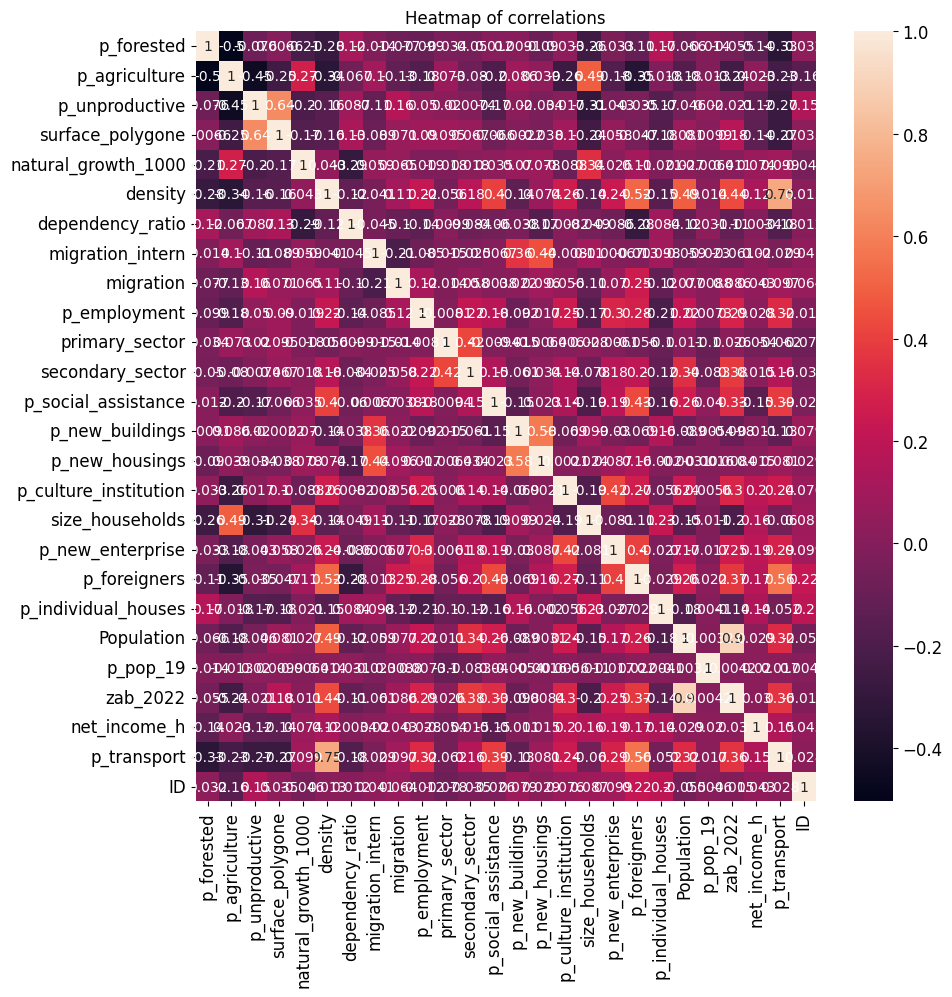

In [174]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (30,50)
plt.show()


Principal component Analysis => cf code in R

After the dimensionality reduction and scaled analysis

In [175]:
df_2020.to_csv('data_scaled_2020.csv', index = False, sep=',')
df_2020

,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,p_employment,...,size_households,p_new_enterprise,p_foreigners,p_individual_houses,Population,p_pop_19,zab_2022,net_income_h,p_transport,ID
0,-0.245738,0.402897,-0.393734,-0.329822,0.657169,0.386937,0.156210,-0.220838,-0.368059,-0.660102,...,0.342743,-0.087325,0.016547,0.893398,0.125350,0.464537,-0.091635,0.481969,0.192706,3
1,0.754537,-1.801276,-0.326181,-0.476380,-0.197584,1.304528,-0.779531,0.556096,0.416991,-0.174106,...,-0.672128,0.019914,0.630033,0.168469,-0.022418,1.710823,0.022381,0.129746,1.669138,27
2,1.465728,-1.485088,-0.203727,-0.478156,1.086859,0.245091,-0.523142,0.282081,2.304888,-0.212076,...,-0.011751,-1.038080,0.025669,0.840140,-0.188108,1.481776,-0.343696,0.871969,0.597094,29
3,-0.120912,-0.414982,-0.423379,-0.282450,0.487948,1.092194,-0.777883,-0.320748,0.318693,0.158678,...,0.145287,0.274032,0.832441,-0.098061,0.613073,3.250606,0.665206,0.175645,1.139595,52
4,0.048533,-0.229732,-0.310059,-0.404433,0.511814,-0.283766,0.295178,0.303928,-0.921892,-0.330393,...,0.723135,1.627954,-0.627398,1.300868,-0.225572,0.454962,-0.349663,0.343796,0.241412,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.215536,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,-0.625791,...,-0.784407,-1.038080,-1.031650,-0.752686,-0.228970,0.166350,-0.465376,-0.483451,-0.764116,767
2141,-0.739225,1.386283,-0.442555,0.789940,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,0.071063,...,0.772904,-0.533064,-0.741061,-1.638173,0.235888,-1.716093,0.212700,-0.462893,-0.588207,1098
2142,0.570351,0.188595,-0.319877,-0.338704,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,-0.437459,...,1.396111,0.681370,-0.949784,0.718804,-0.228121,-4.692857,-0.441456,0.033554,-0.619141,3219
2143,-0.198285,0.303895,-0.284078,-0.367720,0.587523,0.025828,-0.616797,1.450779,-1.337355,0.329981,...,0.583969,-0.168686,0.025405,1.262003,-0.086840,-3.481896,-0.130005,0.009768,-0.236176,4072


##Number of clusters

delete the weights

In [176]:
df_2020.drop('Population', axis=1, inplace=True)
df_2020.drop('surface_polygone', axis=1, inplace=True)
df_2020.drop('ID', axis=1, inplace=True)

Silhouette score

set up to do a K-Means analysis

Determination of the parameters and the number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

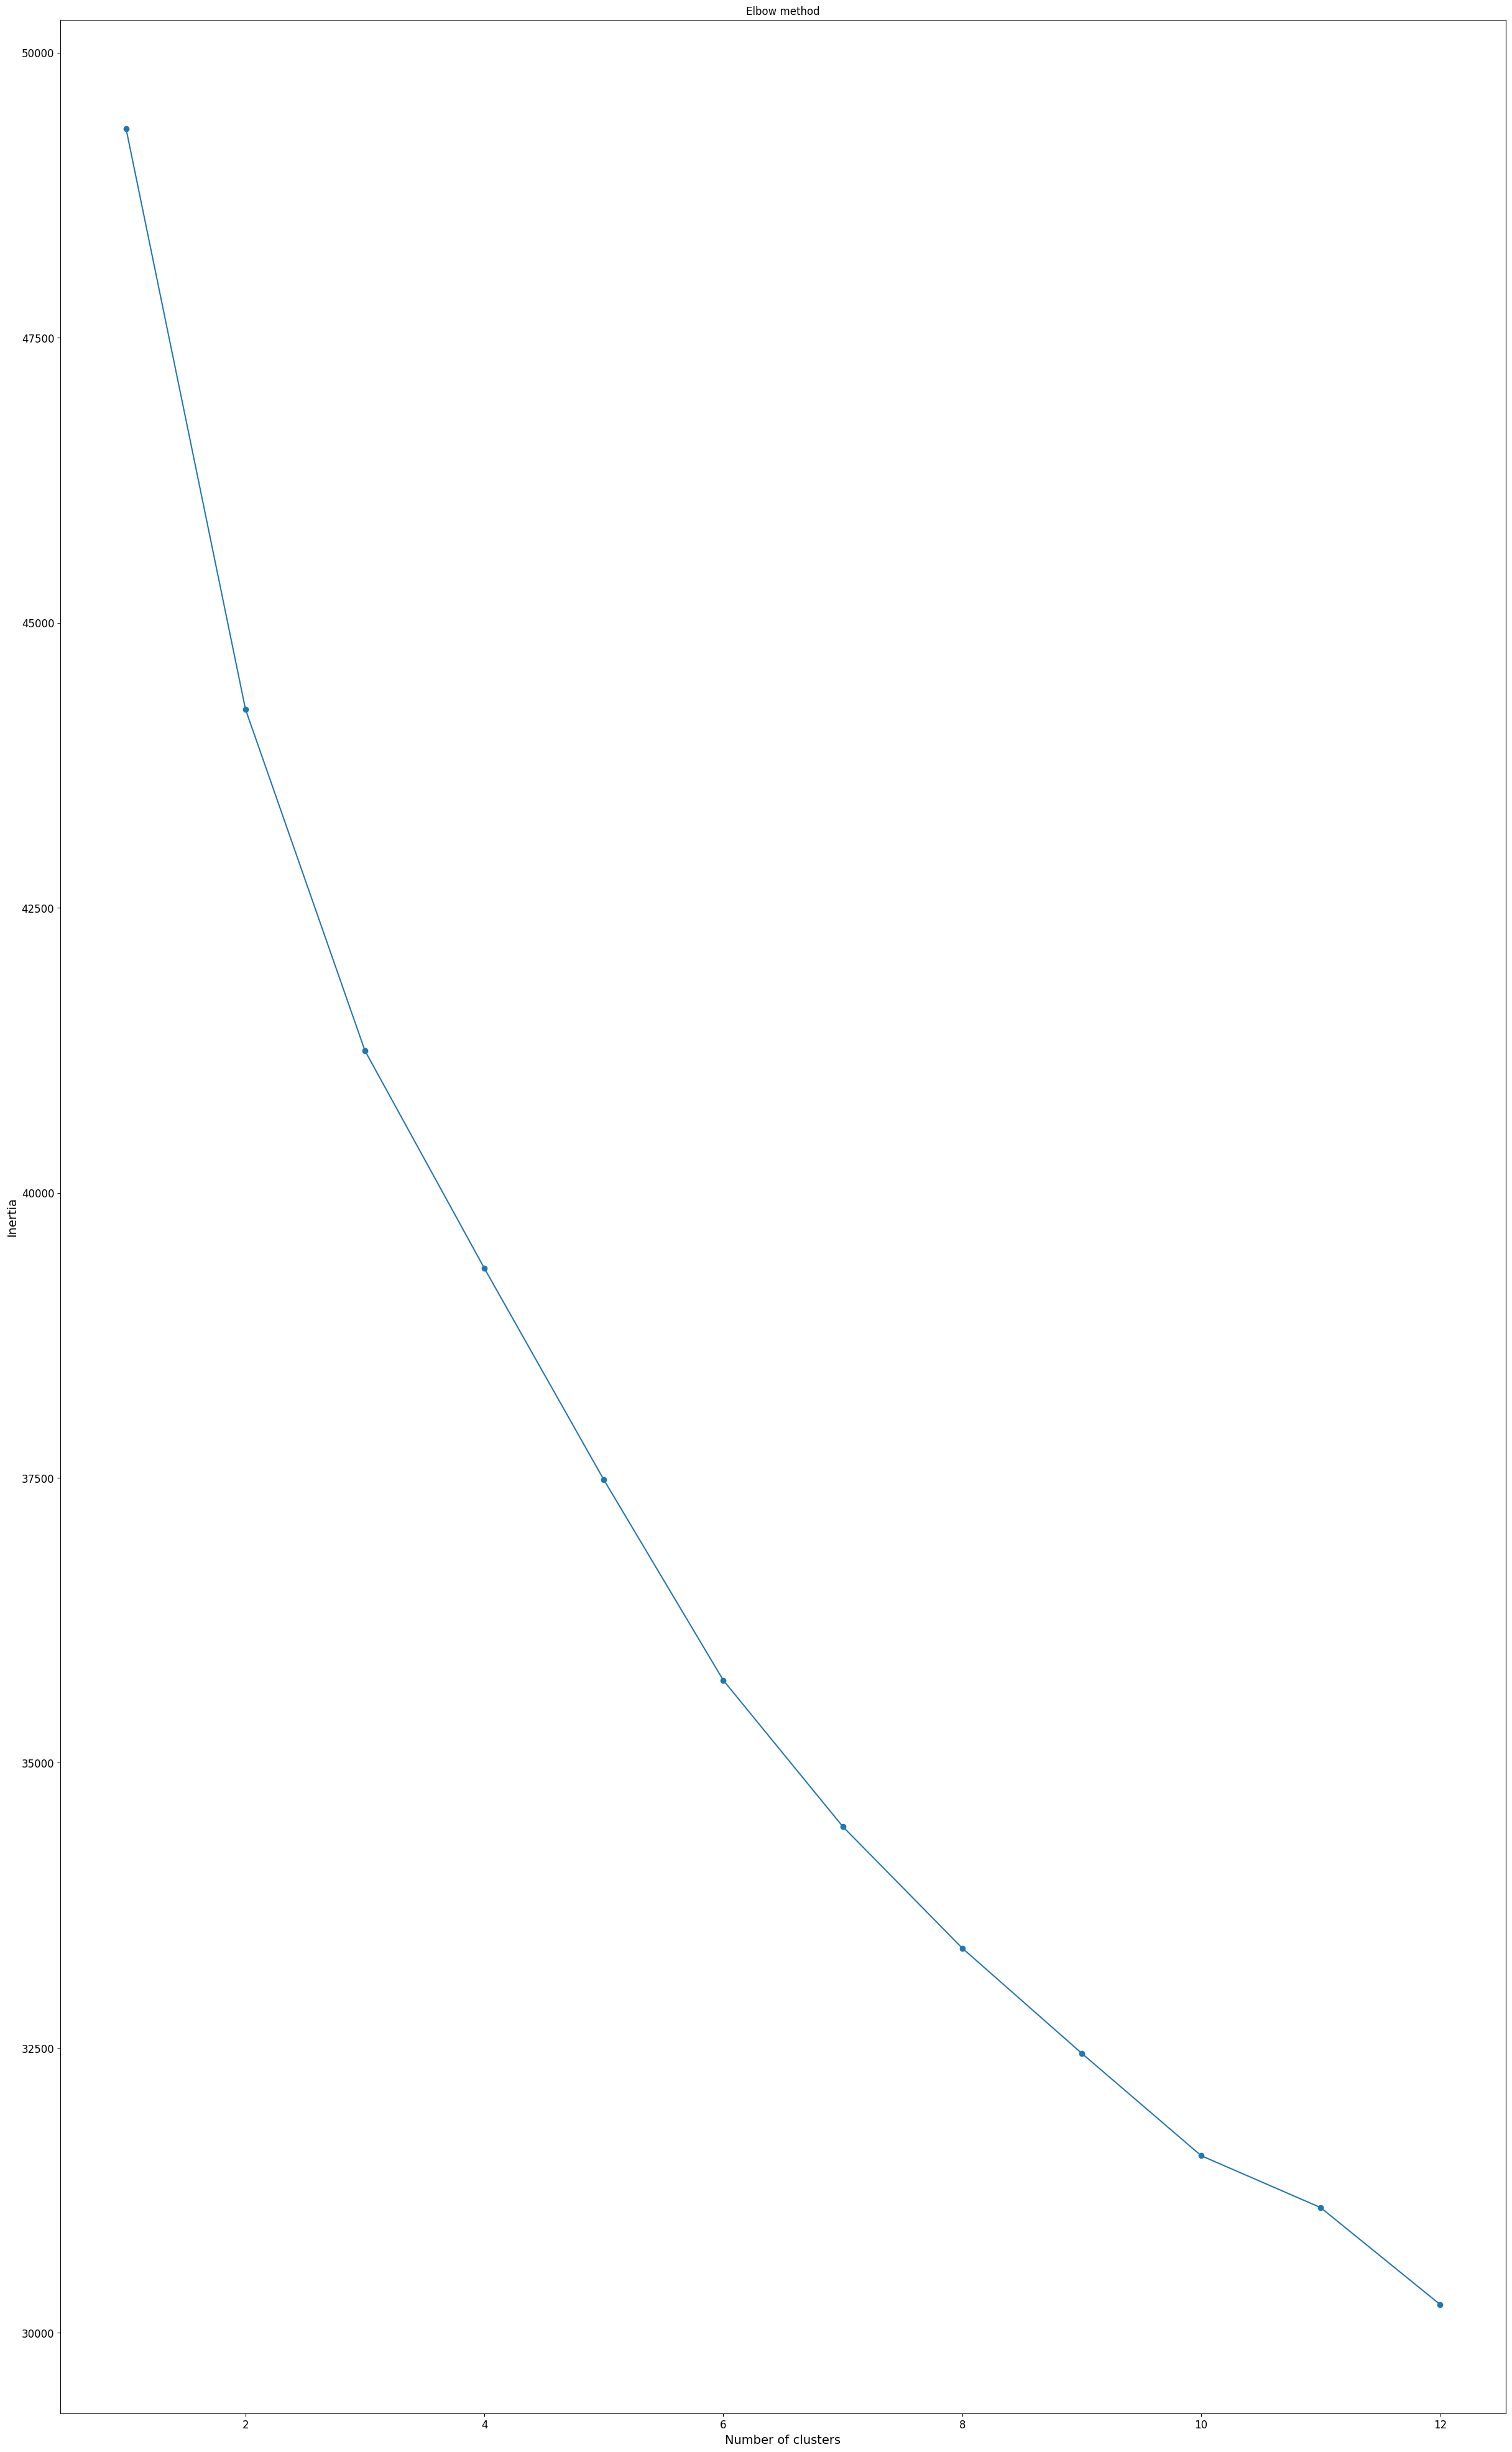

In [177]:
from sklearn.cluster import KMeans

df_2020 = np.nan_to_num(df_2020, nan=0)

inertias = []

for i in range(1,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [178]:
from sklearn.metrics import silhouette_score
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(df_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(df_2020, cluster_labels))
silhouette_ann

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.18859951361229274,
 0.11501316110389419,
 0.12092740087065049,
 0.14521414838260985,
 0.090100430382305,
 0.07991332090061969,
 0.07011771183131546,
 0.07349243530006744]

In [179]:
num_clusters

9

In [180]:
Ncluster = range(1,num_clusters)
Ncluster
silhouette_ann

[0.18859951361229274,
 0.11501316110389419,
 0.12092740087065049,
 0.14521414838260985,
 0.090100430382305,
 0.07991332090061969,
 0.07011771183131546,
 0.07349243530006744]

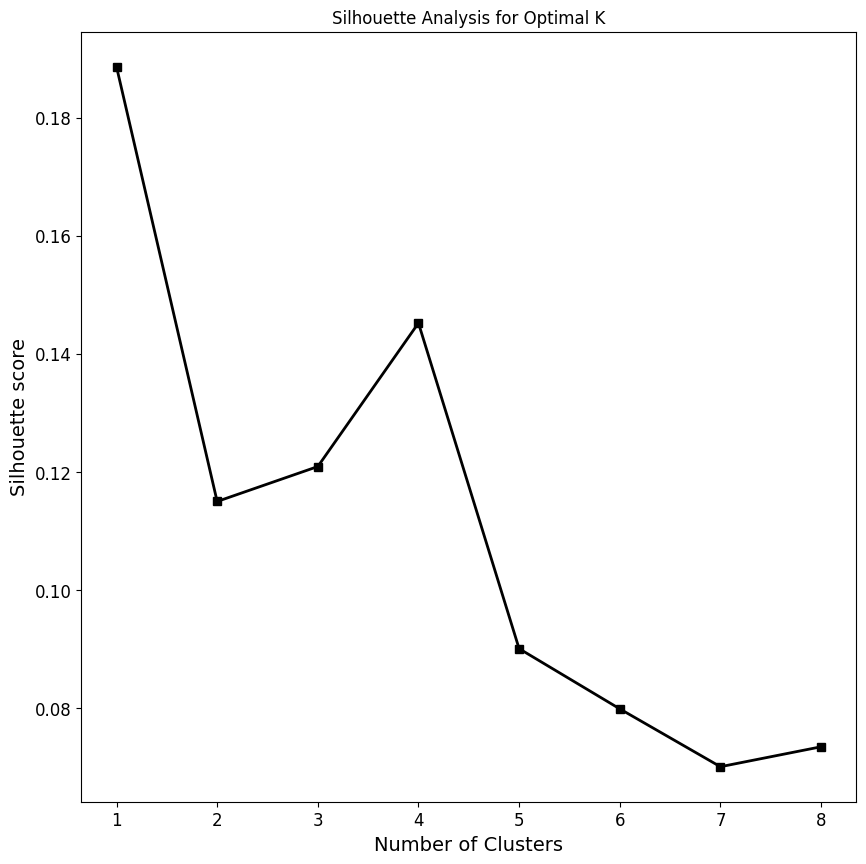

In [181]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [182]:
df_2020 = pd.DataFrame(df_2020)

In [183]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,-0.660102,-0.246436,...,-0.601363,0.364846,0.342743,-0.087325,0.016547,0.893398,0.464537,-0.091635,0.481969,0.192706
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,-0.174106,-0.246436,...,0.634757,-0.671572,-0.672128,0.019914,0.630033,0.168469,1.710823,0.022381,0.129746,1.669138
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,-0.212076,-0.246436,...,0.165291,0.008356,-0.011751,-1.038080,0.025669,0.840140,1.481776,-0.343696,0.871969,0.597094
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,0.158678,-0.246436,...,-0.165320,-0.182980,0.145287,0.274032,0.832441,-0.098061,3.250606,0.665206,0.175645,1.139595
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,-0.330393,-0.246436,...,1.275799,0.297523,0.723135,1.627954,-0.627398,1.300868,0.454962,-0.349663,0.343796,0.241412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,-0.625791,-0.246436,...,-0.620294,-1.163529,-0.784407,-1.038080,-1.031650,-0.752686,0.166350,-0.465376,-0.483451,-0.764116
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,0.071063,-0.246436,...,0.861792,0.238730,0.772904,-0.533064,-0.741061,-1.638173,-1.716093,0.212700,-0.462893,-0.588207
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,-0.437459,-0.246436,...,-0.519450,0.595433,1.396111,0.681370,-0.949784,0.718804,-4.692857,-0.441456,0.033554,-0.619141
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,0.329981,-0.246436,...,0.353968,0.107003,0.583969,-0.168686,0.025405,1.262003,-3.481896,-0.130005,0.009768,-0.236176


Implement a weighted K-means


In [184]:
df_2020_K = df_2020

1. K-means without weight

In [185]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_2020)
print(kmeans)

y_kmean_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [186]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,-0.660102,-0.246436,...,-0.601363,0.364846,0.342743,-0.087325,0.016547,0.893398,0.464537,-0.091635,0.481969,0.192706
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,-0.174106,-0.246436,...,0.634757,-0.671572,-0.672128,0.019914,0.630033,0.168469,1.710823,0.022381,0.129746,1.669138
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,-0.212076,-0.246436,...,0.165291,0.008356,-0.011751,-1.038080,0.025669,0.840140,1.481776,-0.343696,0.871969,0.597094
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,0.158678,-0.246436,...,-0.165320,-0.182980,0.145287,0.274032,0.832441,-0.098061,3.250606,0.665206,0.175645,1.139595
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,-0.330393,-0.246436,...,1.275799,0.297523,0.723135,1.627954,-0.627398,1.300868,0.454962,-0.349663,0.343796,0.241412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,-0.625791,-0.246436,...,-0.620294,-1.163529,-0.784407,-1.038080,-1.031650,-0.752686,0.166350,-0.465376,-0.483451,-0.764116
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,0.071063,-0.246436,...,0.861792,0.238730,0.772904,-0.533064,-0.741061,-1.638173,-1.716093,0.212700,-0.462893,-0.588207
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,-0.437459,-0.246436,...,-0.519450,0.595433,1.396111,0.681370,-0.949784,0.718804,-4.692857,-0.441456,0.033554,-0.619141
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,0.329981,-0.246436,...,0.353968,0.107003,0.583969,-0.168686,0.025405,1.262003,-3.481896,-0.130005,0.009768,-0.236176


In [187]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_2020)
y_kmean_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. K-Means avec weighted pop

In [188]:
kmeans = KMeans(n_clusters=3)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [189]:
kmeans = KMeans(n_clusters=7)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3. K-Means with weight on the surface

In [190]:
kmeans = KMeans(n_clusters=3)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
print(kmeans)
y_kmean_surf_3 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [191]:
kmeans = KMeans(n_clusters=7)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_surf_7 = kmeans.predict(df_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [192]:
df_2020['cluster_3']= y_kmean_3
df_2020['cluster_7']= y_kmean_7
df_2020['cluster_pop_3']= y_kmean_pop_3
df_2020['cluster_pop_7']= y_kmean_pop_7
df_2020['cluster_surf_3']= y_kmean_surf_3
df_2020['cluster_surf_7']= y_kmean_surf_7

In [193]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,-0.660102,-0.246436,...,0.464537,-0.091635,0.481969,0.192706,1,1,1,2,2,0
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,-0.174106,-0.246436,...,1.710823,0.022381,0.129746,1.669138,2,2,1,6,2,2
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,-0.212076,-0.246436,...,1.481776,-0.343696,0.871969,0.597094,0,2,1,4,2,3
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,0.158678,-0.246436,...,3.250606,0.665206,0.175645,1.139595,2,2,1,6,2,2
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,-0.330393,-0.246436,...,0.454962,-0.349663,0.343796,0.241412,1,1,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,-0.625791,-0.246436,...,0.166350,-0.465376,-0.483451,-0.764116,1,3,1,2,2,0
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,0.071063,-0.246436,...,-1.716093,0.212700,-0.462893,-0.588207,1,1,1,2,2,0
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,-0.437459,-0.246436,...,-4.692857,-0.441456,0.033554,-0.619141,1,1,1,2,2,0
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,0.329981,-0.246436,...,-3.481896,-0.130005,0.009768,-0.236176,1,1,1,2,2,0


3. Kmeans en fonction du PCA

1. importer les valeurs 


In [194]:
url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/PCA_data_2020.xlsx?raw=true'
df_2020_pca = pd.read_excel(url)
df_2020_pca =  df_2020_pca.iloc[:,2:7]
df_2020_pca


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0,-0.961361,1.115262,0.223776,1.251524,-0.747977
1,1.745763,0.648010,1.628938,0.149115,-1.149523
2,-0.417905,0.300238,1.647054,0.086951,-0.808187
3,1.699130,0.975883,0.156435,0.807433,-2.637612
4,-0.713410,0.690992,0.628120,-0.982918,-0.487063
...,...,...,...,...,...
2140,-2.225687,-0.922243,-0.046388,0.842736,-0.986549
2141,-1.545620,0.241683,-1.291433,-0.320292,0.276301
2142,-2.236196,0.020155,-0.051344,0.736701,5.071886
2143,-1.526253,1.155124,0.312320,-0.609220,3.840575


In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stdf_2020_pca = scaler.fit_transform(df_2020_pca)

df_2020_pca = pd.DataFrame(data=stdf_2020_pca, columns=df_2020_pca.columns)

In [196]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca = kmeans_pca.predict(df_2020_pca)

weights = w_pop
kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca_pop = kmeans_pca.predict(df_2020_pca,sample_weight = w_pop)

weights = w_surf
kmeans_pca = KMeans(n_clusters=7)
kmeans_pca.fit(df_2020_pca) 
y_kmean_pca_surf = kmeans_pca.predict(df_2020_pca,sample_weight = w_surf)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [197]:
df_2020['pca_cluster']= y_kmean_pca
df_2020['pca_surf']= y_kmean_pca_surf
df_2020['pca_pop']= y_kmean_pca_pop
df_2020

,0,1,2,3,4,5,6,7,8,9,...,22,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7,pca_cluster,pca_surf,pca_pop
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,-0.660102,-0.246436,...,0.192706,1,1,1,2,2,0,1,1,4
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,-0.174106,-0.246436,...,1.669138,2,2,1,6,2,2,4,5,5
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,-0.212076,-0.246436,...,0.597094,0,2,1,4,2,3,1,1,4
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,0.158678,-0.246436,...,1.139595,2,2,1,6,2,2,1,1,4
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,-0.330393,-0.246436,...,0.241412,1,1,1,2,2,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,-0.625791,-0.246436,...,-0.764116,1,3,1,2,2,0,5,0,0
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,0.071063,-0.246436,...,-0.588207,1,1,1,2,2,0,5,0,0
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,-0.437459,-0.246436,...,-0.619141,1,1,1,2,2,0,0,3,1
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,0.329981,-0.246436,...,-0.236176,1,1,1,2,2,0,0,3,1


In [198]:
df_2020['ID'] = df_ID
df_2020.to_csv('data_kmeansweighted.csv', index = False, sep=',')


In [199]:
df_2020

,0,1,2,3,4,5,6,7,8,9,...,cluster_3,cluster_7,cluster_pop_3,cluster_pop_7,cluster_surf_3,cluster_surf_7,pca_cluster,pca_surf,pca_pop,ID
0,-0.245738,0.402897,-0.393734,0.657169,0.386937,0.156210,-0.220838,-0.368059,-0.660102,-0.246436,...,1,1,1,2,2,0,1,1,4,3
1,0.754537,-1.801276,-0.326181,-0.197584,1.304528,-0.779531,0.556096,0.416991,-0.174106,-0.246436,...,2,2,1,6,2,2,4,5,5,27
2,1.465728,-1.485088,-0.203727,1.086859,0.245091,-0.523142,0.282081,2.304888,-0.212076,-0.246436,...,0,2,1,4,2,3,1,1,4,29
3,-0.120912,-0.414982,-0.423379,0.487948,1.092194,-0.777883,-0.320748,0.318693,0.158678,-0.246436,...,2,2,1,6,2,2,1,1,4,52
4,0.048533,-0.229732,-0.310059,0.511814,-0.283766,0.295178,0.303928,-0.921892,-0.330393,-0.246436,...,1,1,1,2,2,0,1,1,4,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.785820,0.105788,-0.229126,-0.107607,-0.441796,-0.491107,0.852667,-0.377731,-0.625791,-0.246436,...,1,3,1,2,2,0,5,0,0,767
2141,-0.739225,1.386283,-0.442555,0.242623,-0.360734,-0.313626,-0.461702,-0.149676,0.071063,-0.246436,...,1,1,1,2,2,0,5,0,0,1098
2142,0.570351,0.188595,-0.319877,-0.581999,-0.373932,-0.823485,-0.658150,-0.710938,-0.437459,-0.246436,...,1,1,1,2,2,0,0,3,1,3219
2143,-0.198285,0.303895,-0.284078,0.587523,0.025828,-0.616797,1.450779,-1.337355,0.329981,-0.246436,...,1,1,1,2,2,0,0,3,1,4072


Merge dataframe for plot visualisation

In [200]:
nostdf_2020

,p_forested,p_agriculture,p_unproductive,surface_polygone,natural_growth_1000,density,dependency_ratio,migration_intern,migration,p_employment,...,size_households,p_new_enterprise,p_foreigners,p_individual_houses,Population,p_pop_19,zab_2022,net_income_h,p_transport,ID
0,0.286676,0.526245,0.010767,743.0,4.650331,755.047106,68.620379,-0.536577,1.073153,0.109269,...,2.368689,0.002674,17.308378,71.557156,5610.0,21.922406,92.40,45237.221823,5.107527,3
1,0.447581,0.104839,0.020161,248.0,-0.547121,1490.725806,59.974037,15.592942,7.933251,0.250744,...,2.178188,0.002975,23.262104,61.704835,3697.0,26.069246,113.23,39810.819037,10.800000,27
2,0.561983,0.165289,0.037190,242.0,7.263123,641.322314,62.343096,9.904259,24.430505,0.239691,...,2.302147,0.000000,17.396907,70.833333,1552.0,25.307125,46.35,51245.633040,6.666667,29
3,0.306755,0.369878,0.006645,903.0,3.621358,1320.487265,59.989266,-2.610746,7.074280,0.347618,...,2.331625,0.003690,25.226434,58.082497,11924.0,31.192661,230.67,40517.938092,8.758315,52
4,0.334012,0.405295,0.022403,491.0,3.766478,217.311609,69.904459,10.357815,-3.766478,0.205248,...,2.440092,0.007498,11.059044,77.094972,1067.0,21.890547,45.26,43108.514664,5.295316,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.452613,0.469442,0.033658,1129.0,0.000000,90.611160,62.639110,21.749876,0.988631,0.119257,...,2.157113,0.000000,7.135875,49.185668,1023.0,20.930233,24.12,30363.800000,1.418440,767
2141,0.207293,0.714254,0.003978,4525.0,2.129623,155.602210,64.279048,-5.537020,2.981472,0.322113,...,2.449434,0.001420,9.955972,37.151248,7041.0,14.666667,148.00,30680.513767,2.096667,1098
2142,0.417952,0.485273,0.021038,713.0,-2.884615,145.021038,59.567901,-9.615385,-1.923077,0.174081,...,2.566416,0.004836,7.930368,69.184290,1034.0,4.761905,28.49,38328.871893,1.977401,3219
2143,0.294309,0.507317,0.026016,615.0,4.226840,465.528455,61.477721,34.166960,-7.396971,0.397485,...,2.413969,0.002445,17.394342,76.566757,2863.0,8.791209,85.39,37962.415631,3.453947,4072


In [201]:
merged_df = pd.merge(df_2020, nostdf_2020, on='ID')

In [202]:
merged_df.to_csv('data_kmeansweighted_full.csv', index = False, sep=',')